In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
print("Packages imported")

Packages imported


# Toxicitiy Data

for simplicity, train data will be looked at.

In [3]:
toxic_data = pd.read_csv("../data/toxicity_raw_train.csv")
toxic_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Data is already one-hot-encoded; no vars removed:
[toxic, severe_toxic, obscene, threat, insult, identity_hate]

In [4]:
toxic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [5]:
toxic_cols = toxic_data.columns[2:]
toxic_cols

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

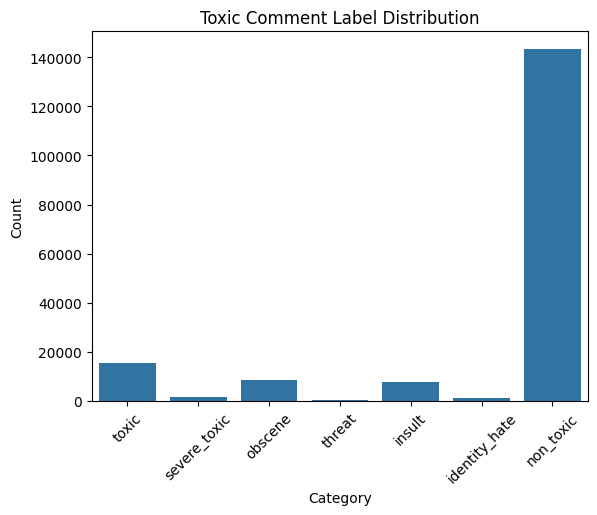

In [6]:
toxic_count = {col: int(toxic_data[col].sum()) for col in toxic_cols}
toxic_count['non_toxic'] = (toxic_data[toxic_cols].sum(axis=1) == 0).sum()

# Create bar plot directly from dictionary
sns.barplot(x=list(toxic_count.keys()), y=list(toxic_count.values()))

plt.title('Toxic Comment Label Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

In [7]:
toxic_data['comment_text'].sample(20).tolist()


['name \n\nLaura Gray Vinning Webber Spencer',
 "Welcome!\n\nHello, Director.sara, and welcome to Wikipedia! Thank you for your contributions.\n\nI notice that one of the first articles you edited  appears to be dealing with a topic with which you may have a conflict of interest. In other words, you may find it difficult to write about that topic in a neutral and objective way, because you are, work for, or represent, the subject of that article. Your recent contributions may have already been undone for this very reason. \n\nTo reduce the chances of your contributions being undone, you might like to draft your revised article before submission, and then ask me or any other editor to proofread it. See our help page on userspace drafts for more details. If the page you created has already been deleted from Wikipedia, but you want to save the content from it to use for that draft, don't hesitate to ask anyone from this list and they will copy it to your user page.\n\nThe one firm rule we

## Processed

In [8]:
toxic_processed= pd.read_csv("../data/processed/toxicity_raw_train_processed.csv")
toxic_processed.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation why the edits made under my userna...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,d'aww! he matches this background colour i'm s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"hey man, i'm really not trying to edit war. it..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,""" more i can't make any real suggestions on im..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"you, sir, are my hero. any chance you remember..."


In [11]:
toxic_comparison = pd.DataFrame({"Raw":toxic_data['comment_text'].head(20).tolist(),
                                "Processed":toxic_processed['clean_text'].head(20).tolist()})
toxic_comparison

,Raw,Processed
0,Explanation\nWhy the edits made under my usern...,explanation why the edits made under my userna...
1,D'aww! He matches this background colour I'm s...,d'aww! he matches this background colour i'm s...
2,"Hey man, I'm really not trying to edit war. It...","hey man, i'm really not trying to edit war. it..."
3,"""\nMore\nI can't make any real suggestions on ...",""" more i can't make any real suggestions on im..."
4,"You, sir, are my hero. Any chance you remember...","you, sir, are my hero. any chance you remember..."
5,"""\n\nCongratulations from me as well, use the ...",""" congratulations from me as well, use the too..."
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,cocksucker before you piss around on my work
7,Your vandalism to the Matt Shirvington article...,your vandalism to the matt shirvington article...
8,Sorry if the word 'nonsense' was offensive to ...,sorry if the word 'nonsense' was offensive to ...
9,alignment on this subject and which are contra...,alignment on this subject and which are contra...


# Emotion Data

In [10]:
emotion_data = pd.read_csv('../data/emotion_raw_train.tsv', delimiter='\t', header=None)
emotion_data.head()

,0,1,2
0,My favourite food is anything I didn't have to...,27,eebbqej
1,"Now if he does off himself, everyone will thin...",27,ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,2,eezlygj
3,To make her feel threatened,14,ed7ypvh
4,Dirty Southern Wankers,3,ed0bdzj


In [2]:
import pandas as pd 
df = pd.read_csv("../data/processed/toxicity_raw_processed.csv")
df_nan = df[df["clean_text"].apply(lambda x: not isinstance(x, str))]
print(df_nan.shape)
df_nan['label_text'].value_counts()


(1345, 5)


label_text
toxic     1344
insult       1
Name: count, dtype: int64

## processed data

### Toxicity

In [ ]:
import pandas as pd 
df = pd.read_csv("../data/processed/toxicity_raw_processed.csv")
df_nan = df[df["clean_text"].apply(lambda x: not isinstance(x, str))]
print(df_nan.shape)
df_nan['label_text'].value_counts()

(1345, 5)


label_text
toxic     1344
insult       1
Name: count, dtype: int64

In [33]:
df['label_text'].value_counts()

label_text
toxic            158640
obscene             523
insult              329
identity_hate        54
threat               25
Name: count, dtype: int64

<Axes: xlabel='label_text'>

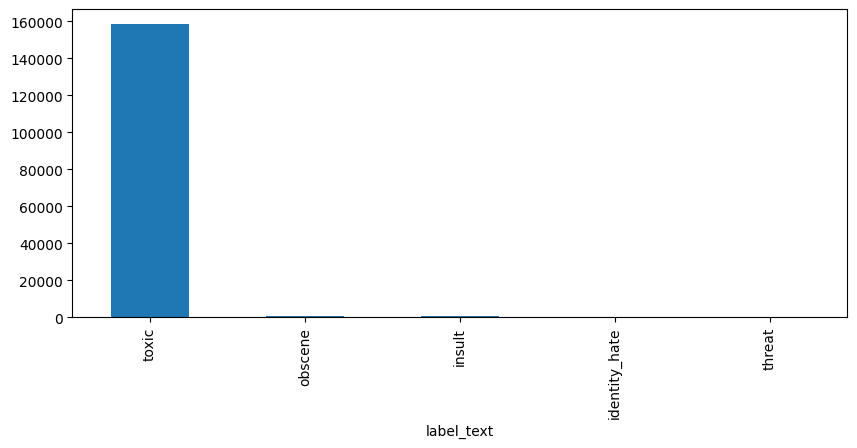

In [32]:
df['label_text'].value_counts().plot(kind='bar', figsize=(10,4))


In [ ]:
import pandas as pd 
df = pd.read_csv("../data/processed_sampled/toxicity_raw_processed.csv")
df_nan = df[df["clean_text"].apply(lambda x: not isinstance(x, str))]
print(df_nan.shape)
df_nan['label_text'].value_counts()

(1345, 5)


label_text
toxic     1344
insult       1
Name: count, dtype: int64

In [ ]:
df['label_text'].value_counts()

label_text
toxic            158640
obscene             523
insult              329
identity_hate        54
threat               25
Name: count, dtype: int64

<Axes: xlabel='label_text'>

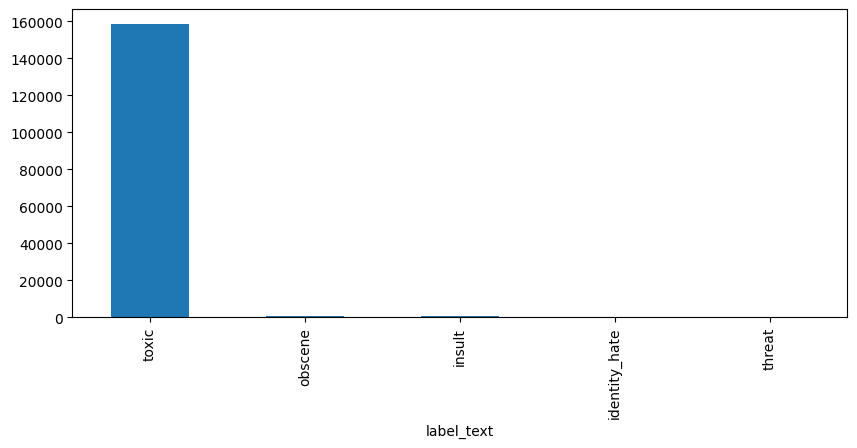

In [ ]:
df['label_text'].value_counts().plot(kind='bar', figsize=(10,4))


### Emotions

In [19]:
import pandas as pd 
df = pd.read_csv("../data/processed/emotion_raw_all_processed.csv")
df_nan = df[df["clean_text"].apply(lambda x: not isinstance(x, str))]
print(df_nan.shape)
df_nan['label_text'].value_counts()

(14, 4)


label_text
['neutral']    14
Name: count, dtype: int64

<Axes: xlabel='label_text'>

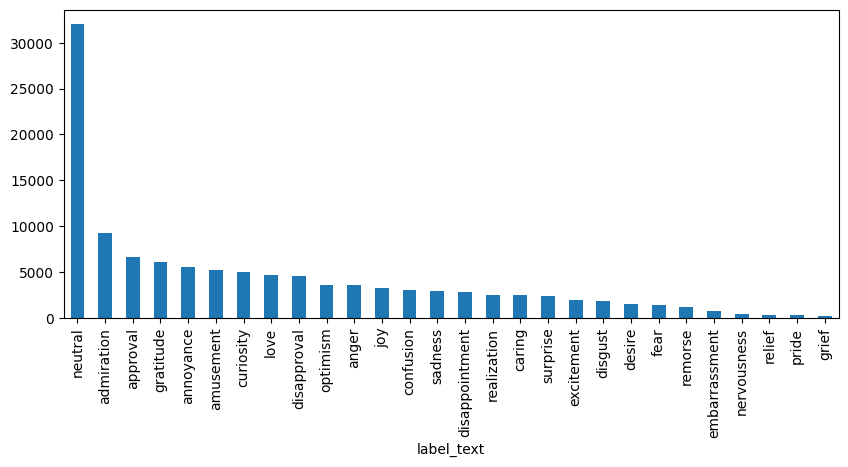

In [20]:
import pandas as pd

# Convert strings like "['joy','anger']" into actual lists if needed
df['label_text'] = df['label_text'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Expand each emotion into its own row
exploded = df.explode('label_text')

# Count how often each emotion appears
emotion_counts = exploded['label_text'].value_counts()

# Plot
emotion_counts.plot(kind='bar', figsize=(10,4))


In [21]:
import pandas as pd

# If label_text is a string like "['neutral', 'joy']"
df['label_text'] = df['label_text'].apply(
    lambda x: eval(x) if isinstance(x, str) else x
)

# Count A: neutral alone
neutral_alone = df['label_text'].apply(
    lambda x: x == ['neutral']
).sum()

# Count B: neutral in multi-emotion rows
neutral_in_pair = df['label_text'].apply(
    lambda x: ('neutral' in x) and (len(x) > 1)
).sum()

# Total neutral occurrences (alone + multi)
neutral_total = neutral_alone + neutral_in_pair

print("neutral alone:", neutral_alone)
print("neutral in pair:", neutral_in_pair)
print("neutral total:", neutral_total)


neutral alone: 28858
neutral in pair: 3154
neutral total: 32012


SAMPLED

In [23]:
import pandas as pd 
df = pd.read_csv("../data/processed_sampled/emotion_raw_all_processed.csv")
df_nan = df[df["clean_text"].apply(lambda x: not isinstance(x, str))]
print(df_nan.shape)
df_nan['label_text'].value_counts()

(1, 4)


label_text
['neutral']    1
Name: count, dtype: int64

<Axes: xlabel='label_text'>

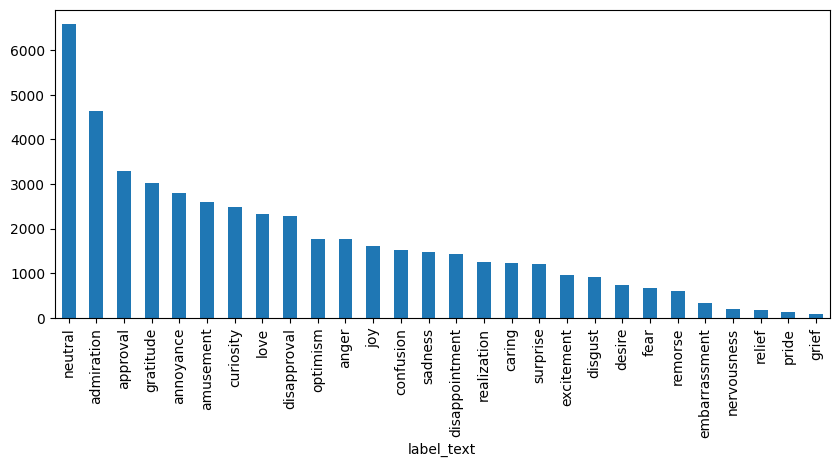

In [24]:
import pandas as pd

# Convert strings like "['joy','anger']" into actual lists if needed
df['label_text'] = df['label_text'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Expand each emotion into its own row
exploded = df.explode('label_text')

# Count how often each emotion appears
emotion_counts = exploded['label_text'].value_counts()

# Plot
emotion_counts.plot(kind='bar', figsize=(10,4))


In [25]:
import pandas as pd

# If label_text is a string like "['neutral', 'joy']"
df['label_text'] = df['label_text'].apply(
    lambda x: eval(x) if isinstance(x, str) else x
)

# Count A: neutral alone
neutral_alone = df['label_text'].apply(
    lambda x: x == ['neutral']
).sum()

# Count B: neutral in multi-emotion rows
neutral_in_pair = df['label_text'].apply(
    lambda x: ('neutral' in x) and (len(x) > 1)
).sum()

# Total neutral occurrences (alone + multi)
neutral_total = neutral_alone + neutral_in_pair

print("neutral alone:", neutral_alone)
print("neutral in pair:", neutral_in_pair)
print("neutral total:", neutral_total)


neutral alone: 5000
neutral in pair: 1577
neutral total: 6577
